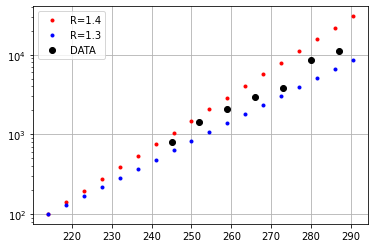

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit

#1.9. UT 245.  #8.9.  15 22 29
#248   PA 4. 11  18  25.9  2.10 9.10

# experimental data from  weekly 4.10 - 9.10
# https://www.novinky.cz/koronavirus/clanek/prehledne-jak-je-na-tom-vas-kraj-v-poctu-testovanych-a-nakazenych-40316485
xe = [245, 252,  259,  266,  273, 280,  287]
ye = [797, 1443, 2108, 2947, 3794, 8616, 11104]

# recurent calculation: generation[n+1] =  generation[n] *R
#   N0 - number of cases in day 1
#   T0 - day 1
#   F  - period for 1 generation in days
POINTS = 18 # generations
R = 1.4     # R
F = 4.5     # contagious days
N0 = 100    # infected  in day 1
T0 = 214    # day 1

def get_curve(R,F,N0,T0):
    """
    recursively calculate number of new cases
    """
    global POINTS
    x=np.arange(POINTS)
    x= F*x + T0
    y = []
    for i in range(len(x)):
        if i>0:
            y.append( R * y[i-1] )
        else:
            y.append(N0)
    return x,y


# FIRST SHOT - LIMITS
x0,y0 = get_curve(R  ,F,     N0,T0)
x1,y1 = get_curve(R-0.1,F,  N0,T0)

plt.plot(x0,y0,"r.", label="R=1.4")
plt.plot(x1,y1,"b.", label="R=1.3")
plt.plot(xe,ye,"ko", label="DATA")

plt.yscale("log")
plt.grid()
plt.legend()

<ValueView of Minuit at 2dc6e70>
  R: 1.4103777197546403
  F: 5.5
  N0: 1.0
  T0: 137.48437052119652
R = 1.410 +/- 0.004
F = 5.500 +/- 0.055
N0 = 1.000 +/- 0.010
T0 = 137.484 +/- 1.174


<ipython-input-12-1f8ab3eddb27>:27: InitialParamWarning: errordef is not given, defaults to 1.
  m = Minuit(lq, R=1.3,F=5.5,N0=1,T0=220, fix_N0=True, fix_F=True)


,R,T0
R,1.00,1.00
T0,1.00,1.00


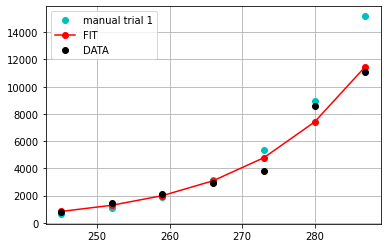

In [12]:
def gen_fun(x, R=1.3,F=3.5,N0=100,T0=220):
    """
    exponential function that corresponds to recurasive calculation
    """
    x2 = 1/F*(x - T0)
    y = N0 * R ** (x2)
    return y


def lq(R=1.3,F=3.5,N0=100,T0=220):
    """
    Least squares - compare data with gen_fun result
    """
    gen_fun_v = np.vectorize(gen_fun)
    ye2 = gen_fun_v(xe,R,F,N0,T0)
    chi2=(ye-ye2)**2
    return chi2.sum()**0.5
    
# FIRST SHOT - LIMITS
x0,y0 = get_curve(R  ,F,     N0,T0)
x1,y1 = get_curve(R-0.08,F,  N0,T0)

gen_fun_v = np.vectorize(gen_fun)
ye2 = gen_fun_v(xe)
#x2,y2 = get_curve(1.25,  3,   N0,T0+1)

m = Minuit(lq, R=1.3,F=5.5,N0=1,T0=220, fix_N0=True, fix_F=True) 

m.migrad() # finds minimum of least_squares function
m.hesse()  # computes errors 

print(m.values)

plt.plot(xe,ye2,"co", label="manual trial 1")
#plt.plot(x0,y0,"y.")
#plt.plot(x1,y1,"y.")

plt.plot(xe, gen_fun_v(xe, *m.values.values()), 'r-o', label="FIT")

plt.plot(xe,ye,"ko", label="DATA")

#plt.plot(x2,y2,".-")
#plt.yscale("log")
plt.grid()
plt.legend()
for p in m.parameters:
    print("{} = {:.3f} +/- {:.3f}".format(p, m.values[p], m.errors[p]))
m.matrix(correlation=True)    